# 1. Identifikasi Nama dan Jenis Atribut

# **Atribut Prediktor**

battery_power 🡪 Numerik (Continuous)

blue 🡪 Kategorik (Binary). Nilai: 0, 1

clock_speed 🡪 Numerik (Continuous)

dual_sim 🡪 Kategorik (Binary). Nilai: 0, 1

fc 🡪 Numerik (Continuous)

four_g 🡪 Kategorik (Binary). Nilai: 0, 1

int_memory 🡪 Numerik (Continuous)

m_dep 🡪 Numerik (Continuous)

mobile_wt 🡪 Numerik (Continuous)

n_cores 🡪 Numerik (Continuous)

pc 🡪 Numerik (Continuous)

px_height 🡪 Numerik (Continuous)

px_width 🡪 Numerik (Continuous)

ram 🡪 Numerik (Continuous)

sc_h 🡪 Numerik (Continuous)

sc_w 🡪 Numerik (Continuous)

talk_time 🡪 Numerik (Continuous)

three_g 🡪 Kategorik (Binary). Nilai : 0, 1

touch_screen 🡪 Kategorik (Binary). Nilai: 0, 1

wifi 🡪 Kategorik (Binary). Nilai: 0, 1

# **Atribut Label :**
price_range 🡪 Kategorik. Nilai:0,1,2,3



# 2. Praprocessing Data



In [4]:
# Importing libraries
!pip install --upgrade kneed

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, silhouette_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering

In [5]:
# Menampilkan dataset
url = 'https://raw.githubusercontent.com/isnanmulia/lecture-datasets/main/mobileprice_modified.csv'
dataset = pd.read_csv(url)
print(dataset)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             842.0     0          2.2         0   1       0         7.0   
1            1021.0     1          0.5         1   0       1        53.0   
2             563.0     1          0.5         1   2       1        41.0   
3             615.0     1          2.5         0   0       0        10.0   
4            1821.0     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995          794.0     1          0.5         1   0       1         2.0   
1996         1965.0     1          2.6         1   0       0        39.0   
1997         1911.0     0          0.9         1   1       1        36.0   
1998         1512.0     0          0.9         0   4       1        46.0   
1999          510.0     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0     

In [6]:
# Memisahkan atribut prediktor dan atribut label
x = dataset.drop(columns=['price_range'])
y = dataset['price_range']

print('Atribut Prediktor(Fitur):')
print(x.head())
print('\nAtribut Label:')
print(y.head())

Atribut Prediktor(Fitur):
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0          842.0     0          2.2         0   1       0         7.0    0.6   
1         1021.0     1          0.5         1   0       1        53.0    0.7   
2          563.0     1          0.5         1   2       1        41.0    0.9   
3          615.0     1          2.5         0   0       0        10.0    0.8   
4         1821.0     1          1.2         0  13       1        44.0    0.6   

   mobile_wt  n_cores  pc  px_height  px_width     ram  sc_h  sc_w  talk_time  \
0      188.0        2   2         20       756     NaN     9     7         19   
1      136.0        3   6        905      1988  2631.0    17     3          7   
2      145.0        5   6       1263      1716  2603.0    11     2          9   
3      131.0        6   9       1216      1786  2769.0    16     8         11   
4      141.0        2  14       1208      1212  1411.0     8     2         15   

   thr

In [7]:
# handling missing values
imputer = SimpleImputer(fill_value=np.nan, strategy='mean')

x_inputed = imputer.fit_transform(x)
x_inputted_df = pd.DataFrame(x_inputed, columns=x.columns)

print("\nAtribut Prediktor setelah handling missing values:")
print(x_inputted_df.head())


Atribut Prediktor setelah handling missing values:
   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1         1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2          563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3          615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4         1821.0   1.0          1.2       0.0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores    pc  px_height  px_width         ram  sc_h  \
0    0.6      188.0      2.0   2.0       20.0     756.0  2124.99196   9.0   
1    0.7      136.0      3.0   6.0      905.0    1988.0  2631.00000  17.0   
2    0.9      145.0      5.0   6.0     1263.0    1716.0  2603.00000  11.0   
3    0.8      131.0      6.0   9.0     1216.0    1786.0  2769.00000  16.0   
4    0.6      141.0      2.0  14.0     1208.0    1212.0  1411.00000   8.0   

   sc_w  talk_time  three_g  touch

In [8]:
#Random sampling
data_sampling = dataset.sample(n=10, replace=True)
print(data_sampling.head(10))

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
462          1986.0     0          0.5         1   3       1        51.0   
856           994.0     1          2.8         1   0       0        56.0   
1728         1065.0     0          2.8         1   0       1        21.0   
661          1897.0     0          3.0         0   1       1        21.0   
1653         1190.0     0          2.0         1   0       0        40.0   
183           959.0     1          2.6         1  15       0        20.0   
833          1368.0     1          1.6         1   4       0         9.0   
954           922.0     1          0.7         0   0       1        47.0   
1627          865.0     0          2.9         0   5       0        16.0   
518          1606.0     0          1.4         0   3       0        57.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
462     0.1      165.0        8  ...        282      1358  1614.0    17    12   
8

In [9]:
#Scalling Data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_inputted_df)
x_scaled_df = pd.DataFrame(x_scaled, columns=x_inputted_df.columns)

print("\nAtribut Prediktor setelah scalling:")
print(x_scaled_df.head())


Atribut Prediktor setelah scalling:
   battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0       0.227789   0.0         0.68       0.0  0.052632     0.0    0.080645   
1       0.347361   1.0         0.00       1.0  0.000000     1.0    0.822581   
2       0.041416   1.0         0.00       1.0  0.105263     1.0    0.629032   
3       0.076152   1.0         0.80       0.0  0.000000     0.0    0.129032   
4       0.881764   1.0         0.28       0.0  0.684211     1.0    0.677419   

      m_dep  mobile_wt   n_cores    pc  px_height  px_width       ram  \
0  0.555556   0.900000  0.142857  0.10   0.010204  0.170895  0.499463   
1  0.666667   0.466667  0.285714  0.30   0.461735  0.993324  0.634687   
2  0.888889   0.541667  0.571429  0.30   0.644388  0.811749  0.627205   
3  0.777778   0.425000  0.714286  0.45   0.620408  0.858478  0.671566   
4  0.555556   0.508333  0.142857  0.70   0.616327  0.475300  0.308658   

       sc_h      sc_w  talk_time  three_g  touch_

In [10]:
#Show data Statistic Descriptif
print('\nStatistic Descriptif before filled missing value:')
print(x.describe())

print('\nStatistic Descriptif after filled missing value dan standarisasi:')
print(x_scaled_df.describe())


Statistic Descriptif before filled missing value:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    1990.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1237.867839     0.4950     1.522250     0.509500     4.309500   
std       439.676025     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       850.250000     0.0000     0.700000     0.000000     1.000000   
50%      1225.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.000000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  1990.000000  2000.000000  1990.000000  2000.000000   
mean      0.521500    31.987940     0.501750   140.344221     4.520500   
std       0.499662    18.136427     0.288416    35.407114   

# 3. Model Klasifikasi: Algoritma SVM
metode holdout dengan proporsi 85% data training dan 15% data testing

In [11]:
# Bagi dataset menjadi data training (85%) dan data testing (15%)
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.15, random_state=0)


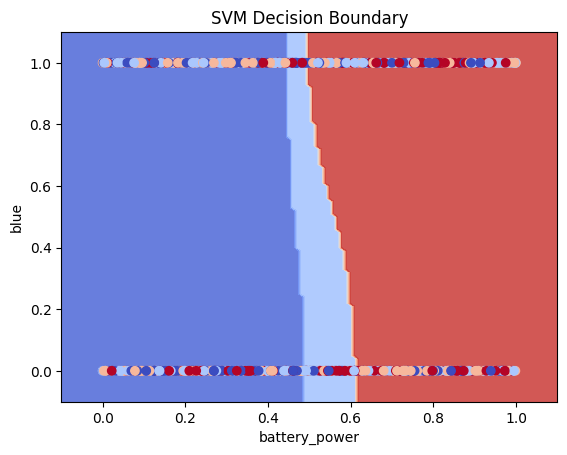

In [12]:
#Visualisasi Model SVM
attr1 = 0
attr2 = 1

#Ambil data dari data training
X_train_vis = x_train.iloc[:, [attr1, attr2]].to_numpy()
y_train_vis = y_train

#Inisialisasi model SVM (Kita ambil contoh default saja)
svm_model = SVC()
svm_model.fit(X_train_vis, y_train_vis)

# meshgrid untuk plot decision boundary
x_min, x_max = X_train_vis[:, 0].min() - 0.1, X_train_vis[:, 0].max() + 0.1
y_min, y_max = X_train_vis[:, 1].min() - 0.1, X_train_vis[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisasikan decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.85)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap=plt.cm.coolwarm)
plt.xlabel(x_train.columns[attr1])
plt.ylabel(x_train.columns[attr2])
plt.title("SVM Decision Boundary")
plt.show()

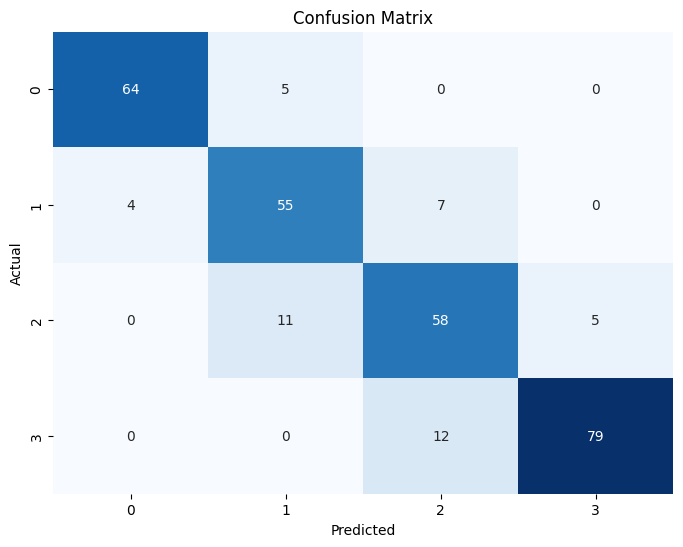

Accuracy: 0.8533333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        69
           1       0.77      0.83      0.80        66
           2       0.75      0.78      0.77        74
           3       0.94      0.87      0.90        91

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300



In [13]:
# Inisialisasi model SVM (dalam contoh ini, kami menggunakan parameter default)
svm_model = SVC()

# Latih model dengan data training
svm_model.fit(x_train, y_train)

# Lakukan prediksi pada data testing
y_pred = svm_model.predict(x_test)

# Hitung confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

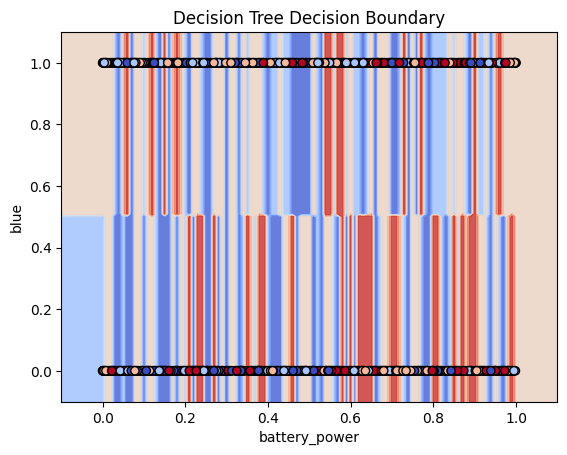

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# The missing import
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier from sklearn.tree

# Visualisasi
attr1 = 0
attr2 = 1

# Ambil dua atribut dari data training
X_train_vis = x_train.iloc[:, [attr1, attr2]].to_numpy()
y_train_vis = y_train

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_vis, y_train_vis)

# Membuat meshgrid untuk plot decision boundary
x_min, x_max = X_train_vis[:, 0].min() - 0.1, X_train_vis[:, 0].max() + 0.1
y_min, y_max = X_train_vis[:, 1].min() - 0.1, X_train_vis[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Menggunakan model Decision Tree untuk prediksi di seluruh grid
Z = dt_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisasikan decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.85)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel(x_train.columns[attr1])
plt.ylabel(x_train.columns[attr2])
plt.title("Decision Tree Decision Boundary")
plt.show()

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# The missing import
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier from sklearn.tree

# Your existing code continues here...

# 4. Clustering: K-Means Clustering

Jumlah klaster optimal (Elbow Point) dengan K-Means: 2


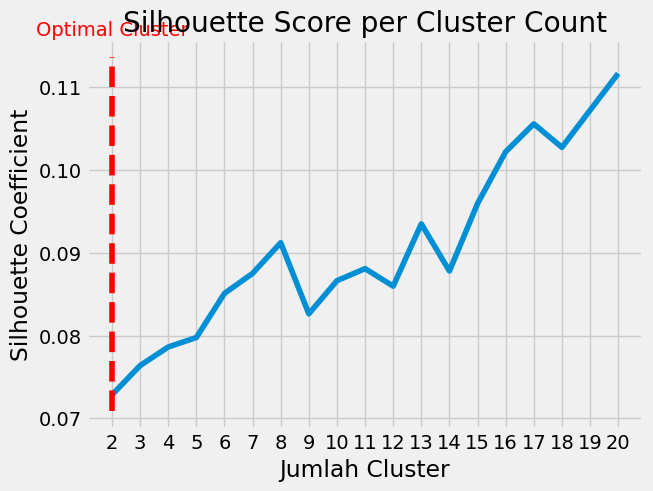

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Inisialisasi list untuk menampung silhouette score
kmeans_silhouette_coefficients = []

# Menjalankan K-Means dengan jumlah cluster mulai dari 2 hingga 20
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x_scaled_df)
    score = silhouette_score(x_scaled_df, kmeans.labels_)
    kmeans_silhouette_coefficients.append(score)

# Plot Silhouette Coefficients
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), kmeans_silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Score per Cluster Count")

# Menentukan jumlah klaster optimal (Elbow Point) berdasarkan silhouette score
kmeans_kl = KneeLocator(x=range(2, 21), y=kmeans_silhouette_coefficients, curve="convex", direction="decreasing")
kmeans_optimal_cluster_count = kmeans_kl.elbow

print("Jumlah klaster optimal (Elbow Point) dengan K-Means:", kmeans_optimal_cluster_count)

# Tampilkan jumlah klaster optimal (Elbow Point) pada plot
plt.vlines(kmeans_optimal_cluster_count, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
plt.text(kmeans_optimal_cluster_count, plt.ylim()[1], 'Optimal Cluster', va='bottom', ha='center', color='r')

plt.show()